## Import required dependencies

In [122]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score
from math import sqrt


%matplotlib inline
from matplotlib import style
style.use("seaborn")

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# General Overview of Dataset


In [123]:
c_data = pd.read_csv("c_data.csv")
e_data = pd.read_csv("e_data.csv")

In [124]:
c_data.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [125]:
e_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

**User_ID** : The ID of the person which is unique.\
**Gender** : Gender of the person.\
**Age** : Age of the person.\
**Height** : Height of the person in $cm$.\
**Weight** : Weight of the person in $kg$.\
**Duration** : Duration of the person's exercise/activity.\
**Heart_Rate** : Heart rate per $min$ of the person.\
**Body_Temp** : Body temperature of the person in $C^{\circ}$.\
**Calories** : Calories burned in kilo calories.

In [126]:
e_c_data = e_data.merge(c_data , on = "User_ID")

In [127]:
e_c_data.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [128]:
e_c_data.shape

(15000, 9)

In [129]:
e_c_data.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [130]:
e_c_data.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

In [131]:
e_c_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

*This dataset does not have any null/NaN values, which is good and it is not necessary to do extra manipulations.


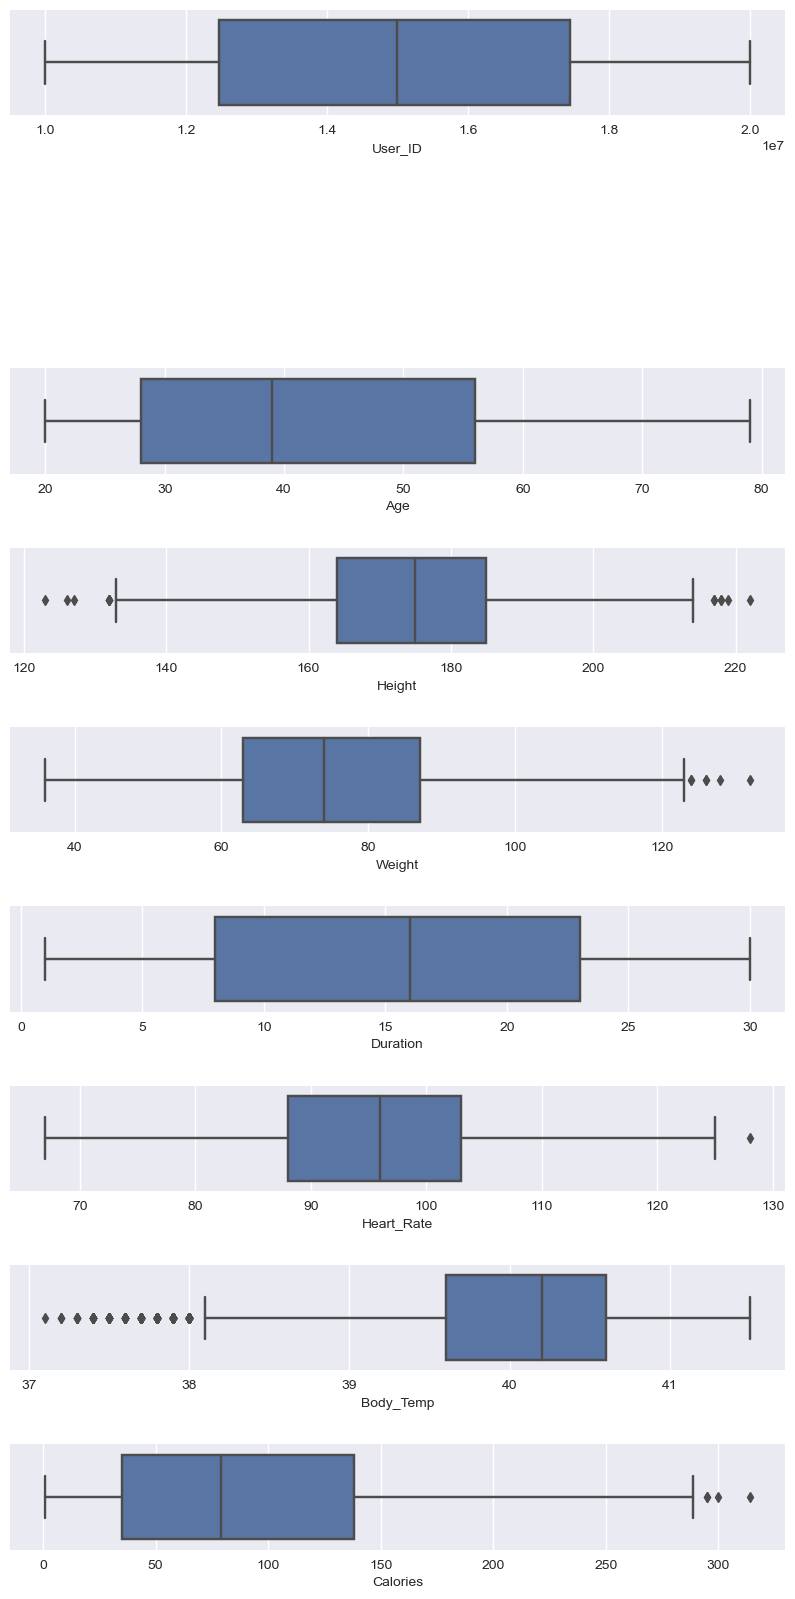

In [132]:
fig1 , axes = plt.subplots(len(e_c_data.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(e_c_data.columns)) , e_c_data.columns):
  try:
    sns.boxplot(data = e_c_data , x = column , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

### Drop Duplicates
Lets assure that this dataset does not contain any duplicate values in `User_ID` column.

In [133]:
print("The shape of dataset before dropping duplicates : " , e_c_data.shape)
e_c_data.drop_duplicates(subset = ['User_ID'], keep='last' , inplace = True)   
print("The shape of dataset after dropping duplicates : " , e_c_data.shape)

The shape of dataset before dropping duplicates :  (15000, 9)
The shape of dataset after dropping duplicates :  (15000, 9)


In the next step we have to delete User_ID feature.Because it is a low predictive feature

In [134]:
e_c_data.drop(columns = "User_ID" , inplace = True)

In [135]:
e_c_train_data , e_c_test_data = train_test_split(e_c_data , test_size = 0.3 , random_state = 1)
print("Shape of training data : " , e_c_train_data.shape)
print("Shape of test data : " , e_c_test_data.shape)

Shape of training data :  (10500, 8)
Shape of test data :  (4500, 8)


### Exploratory Data Analysis(EDA)

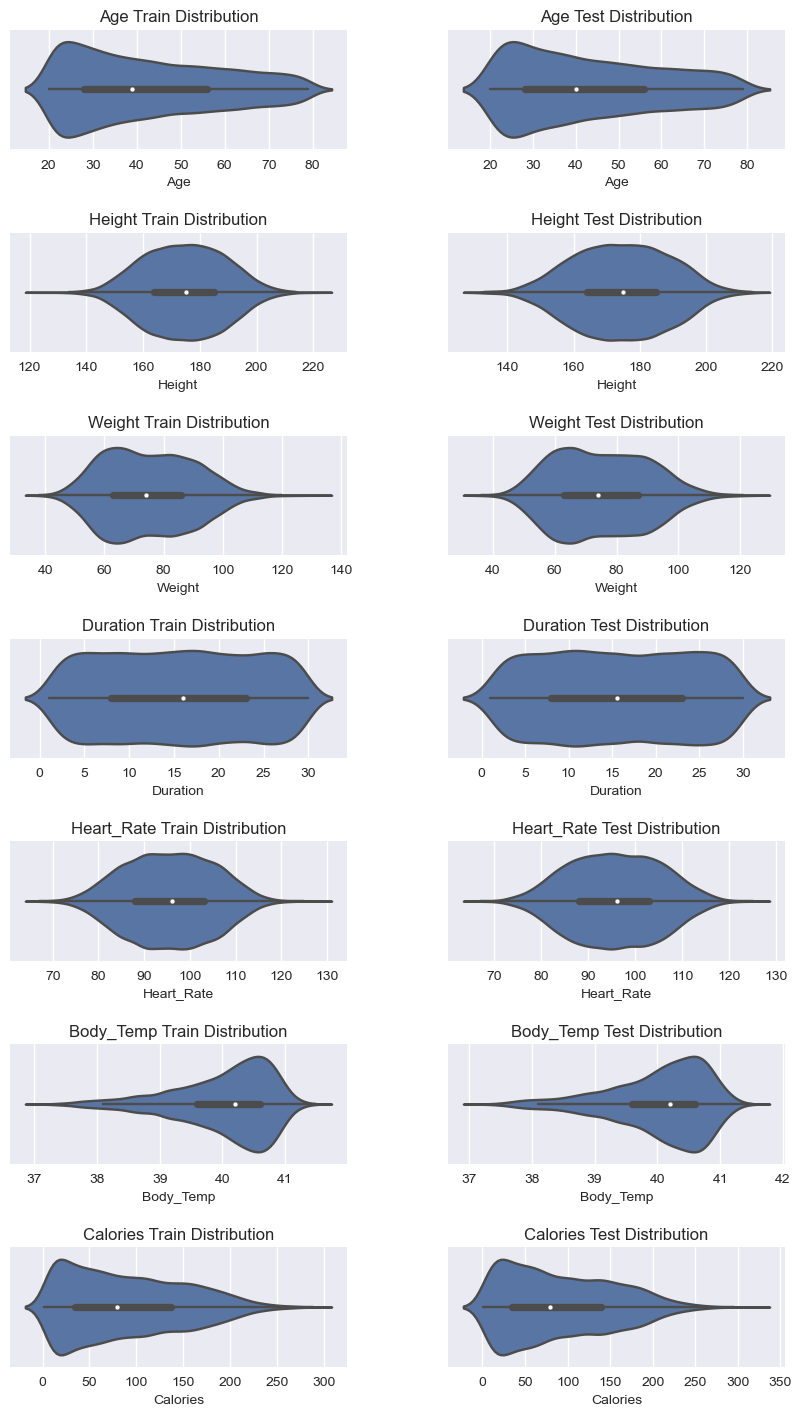

In [136]:
fig1, axes = plt.subplots(len(e_c_train_data.columns), 2, figsize=(10, 20))
plt.subplots_adjust(wspace=0.3, hspace=0.7)
axes = axes.flatten()

for i, column in zip(range(0, len(e_c_train_data.columns) * 2, 2), e_c_train_data.columns):
    try:
        axes[i].title.set_text(column + " Train Distribution")
        sns.violinplot(data=e_c_train_data, x=column, ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

for i, column in zip(range(1, len(e_c_train_data.columns) * 2, 2), e_c_train_data.columns):
    try:
        axes[i].title.set_text(column + " Test Distribution")
        sns.violinplot(data=e_c_test_data, x=column, ax=axes[i])
    except:
        fig1.delaxes(axes[i])
        continue

plt.show()


The distributions of features for training and test sets are pretty similar

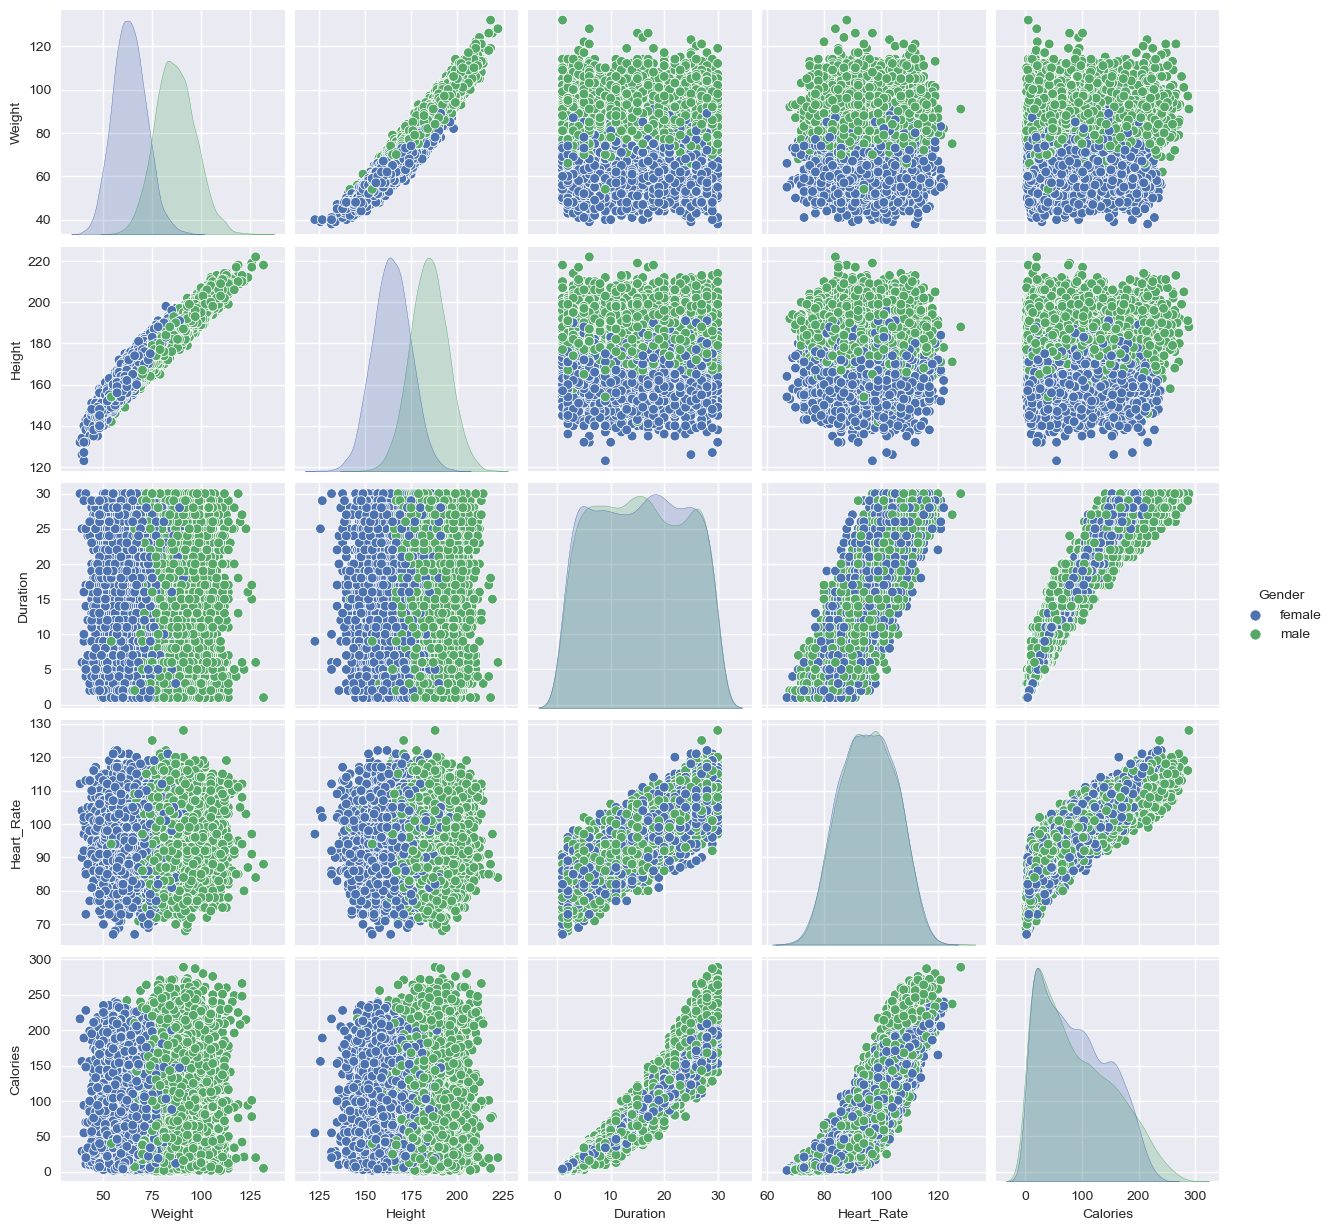

In [137]:
sns.pairplot(e_c_train_data[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")

In [138]:
print('Minimum age in dataset is : ' , e_c_train_data["Age"].min())
print('Maximum age in dataset is : ' , e_c_train_data["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [139]:
age_groups = ["Young" , "Middle-Aged" , "Old"]
e_c_train_data["age_groups"] = pd.cut(e_c_train_data["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)


In [140]:
e_c_train_data["age_groups"].value_counts()

Young          5271
Middle-Aged    3093
Old            2136
Name: age_groups, dtype: int64

In [141]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* Old individuals have burned more kilocalories in compare of two other age groups.
* Young individuals are the least in burning kilocalories.

* Females in all age ranges burnt same amount of kilocalories in average.
* Old males have performed very well and young males have burnt the least kilocalories.

* Also there is an outlier for young group which is shown by a point.

In [142]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Duration" , color = "Gender")

fig.update_layout(      
    width=750,
    height=450,
)

fig.show()

* The exercise duration of each group is pretty identical.
* The median exercise duration of this dataset is about 15 minutes

In [143]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Heart_Rate" , color = "Gender")

fig.update_layout(      
    width=750,
    height=450,
)

fig.show()

* The heart rate of each group is pretty identical.
* The median heart rate of this dataset is about 95 beats per minute.

We combine "Weight" and "Height" column into "BMI".

In [144]:
for data in [e_c_train_data , e_c_test_data]:         # adding BMI column to both training and test sets
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [145]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]

e_c_train_data["Categorized_BMI"] = pd.cut(e_c_train_data["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)



In [146]:
e_c_train_data["Categorized_BMI"] = e_c_train_data["Categorized_BMI"].astype("object") # converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column

In [147]:
np.unique(e_c_train_data["Categorized_BMI"])

array(['Normal', 'Overweight'], dtype=object)

<Axes: xlabel='Categorized_BMI', ylabel='count'>

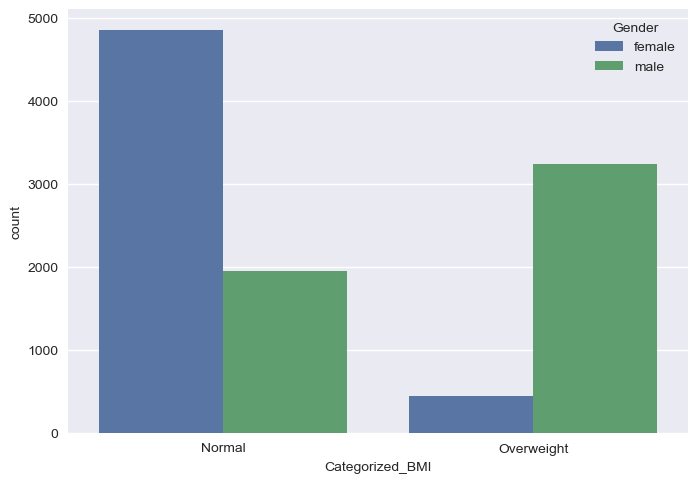

In [148]:
sns.countplot(data = e_c_train_data , x = "Categorized_BMI",hue="Gender")

* More females are normal weighted according to BMI Categories.
* More males are overweight according to BMI Categories.

<Axes: xlabel='Categorized_BMI', ylabel='count'>

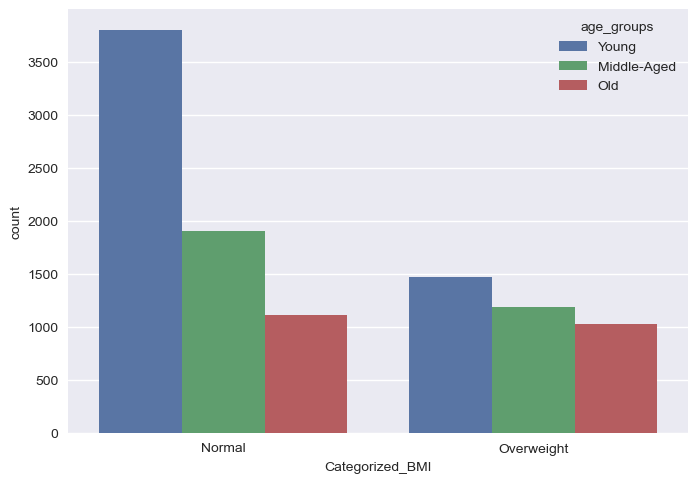

In [149]:
sns.countplot(data = e_c_train_data , x = "Categorized_BMI",hue="age_groups")

In [150]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Calories" , color = "Categorized_BMI")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* For all age groups, the calorie burnt distribution is similar between the Normal and Overweight BMI categories.
* There is no significant deviation or trend in calorie burnt as the age increases, suggesting that calorie burnt remains relatively stable across different age groups regardless of BMI category.
* There is one significant outlier in the Young age group for the Overweight BMI category, indicating a much higher calorie burnt than the rest of the data points.

In [151]:
fig = px.box(e_c_train_data , x= "age_groups" , y = "Duration" , color = "Categorized_BMI")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

* For each age group, the median duration is similar for both Normal and Overweight BMI categories. 
* This indicates that age does not significantly alter the relationship between BMI category and duration.

<Axes: >

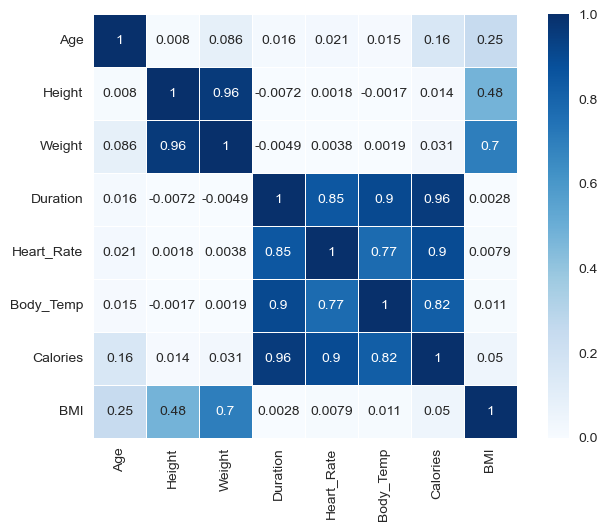

In [152]:
corr = e_c_train_data.corr()
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')

* This heatmap shows the correlation of both features in each cell.
* If two or more features have a high correlation with each other, we have to save one of them and drop the rest.
* According to the heatmap, `Weight` and `Height` have a high correlation but we combined them and put them into the `BMI` column.So we can drop `Weight` and `Height` columns and save `BMI`.


### Training and Testing dataset

In [153]:
e_c_train_data = e_c_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
e_c_test_data = e_c_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
e_c_train_data = pd.get_dummies(e_c_train_data, drop_first = True)
e_c_test_data = pd.get_dummies(e_c_test_data, drop_first = True)

In [154]:
X_train = e_c_train_data.drop("Calories" , axis = 1)
y_train = e_c_train_data["Calories"]

X_test = e_c_test_data.drop("Calories" , axis = 1)
y_test = e_c_test_data["Calories"]


In [155]:
e_c_test_data

Age    BMI  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
7576    74  24.98      29.0       106.0       41.0     198.0            0
10509   43  26.88      13.0        97.0       39.9      72.0            1
4253    43  23.74      29.0       108.0       40.5     195.0            0
5150    62  25.36       4.0        83.0       38.9      17.0            1
506     37  22.39      15.0        94.0       40.0      74.0            0
...    ...    ...       ...         ...        ...       ...          ...
5682    38  23.23      12.0        89.0       39.8      53.0            0
11109   29  23.78      10.0        89.0       39.7      42.0            0
7443    77  23.24      30.0       110.0       41.0     218.0            0
10077   32  24.48       6.0        85.0       39.5      19.0            1
13653   41  23.41      10.0        95.0       39.3      49.0            0

[4500 rows x 7 columns]

In [156]:
e_c_train_data

Age    BMI  Duration  Heart_Rate  Body_Temp  Calories  Gender_male
4834    20  23.74       5.0        82.0       39.4      17.0            0
12171   53  24.69      19.0        99.0       40.7     110.0            0
3502    36  23.11      23.0       104.0       40.9     137.0            0
11546   70  24.03       4.0        81.0       38.7      17.0            0
6950    63  24.12      16.0        90.0       40.2      85.0            1
...    ...    ...       ...         ...        ...       ...          ...
905     25  23.62      19.0        99.0       40.6     101.0            0
5192    24  26.02       6.0        84.0       39.0      16.0            1
12172   52  23.74      15.0        99.0       39.9      94.0            1
235     70  24.16       9.0        79.0       40.0      34.0            0
13349   30  23.42      11.0        87.0       39.8      46.0            0

[10500 rows x 7 columns]

In [157]:
def mod(model):
 model.fit(X_train,y_train)
 y_pred = model.predict(X_test)
 r2score = r2_score(y_test, y_pred)
 rms = sqrt(mean_squared_error(y_test,y_pred))
 k_folds = KFold(n_splits = 5)
 scores = cross_val_score(model,X_train,np.ravel(y_train), cv = k_folds)
    
 print("Model :", model)
 print("r2 score : ", r2score)
 print("Root Mean Error : ", rms)
 print("Cross Validation Scores: ", scores)
 print("Average CV Score: ", scores.mean())

 fig = plt.figure()
 ax = fig.add_subplot(111)

 ax.errorbar(y_test, y_pred, fmt='o')
 ax.errorbar([1, y_test.max()], [1, y_test.max()])

Model : LinearRegression()
r2 score :  0.9661275779854936
Root Mean Error :  11.621709983216027
Cross Validation Scores:  [0.96765854 0.96655602 0.96738864 0.96691045 0.96645322]
Average CV Score:  0.9669933763455321


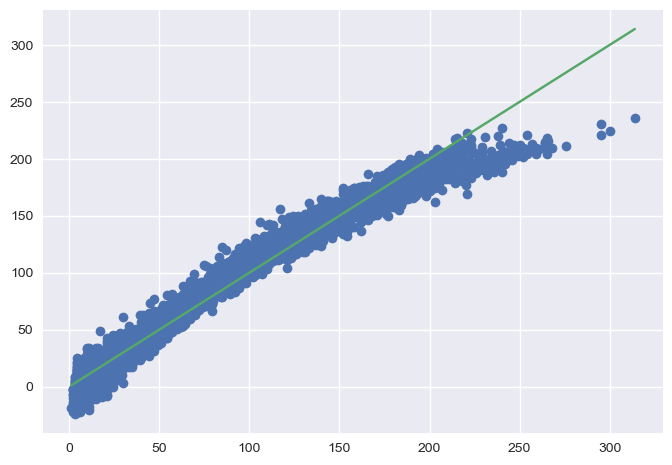

In [158]:
from sklearn.linear_model import LinearRegression
mod(LinearRegression())

Model : RandomForestRegressor()
r2 score :  0.9961100545292105
Root Mean Error :  3.9383894960024235
Cross Validation Scores:  [0.99584196 0.99629854 0.99546593 0.99587367 0.99597164]
Average CV Score:  0.9958903475624075


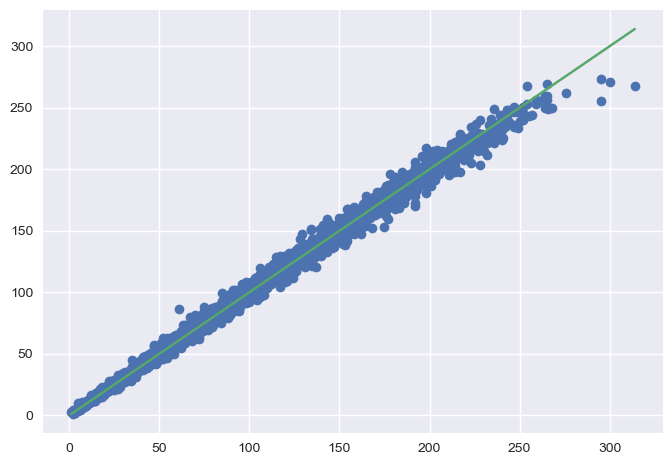

In [159]:
mod(RandomForestRegressor())

Model : LogisticRegression()
r2 score :  0.929097866599775
Root Mean Error :  16.814213564058765
Cross Validation Scores:  [0.0647619  0.05095238 0.05190476 0.05333333 0.05952381]
Average CV Score:  0.0560952380952381


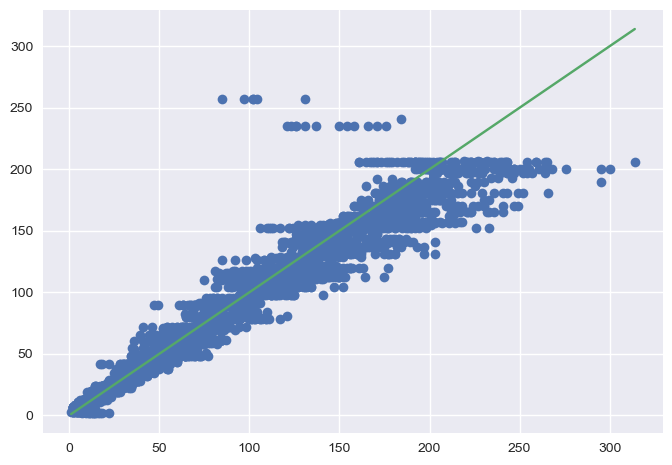

In [160]:
mod(LogisticRegression())

We will be going with RandomForest